In [2]:
###########################################################
#                  WORK IN PROGRESS!                      #
###########################################################

# Simulates Ising model using Monte Carlo techniques
# By Amol Deshmukh and Areg Ghazaryan, The City College of New York, June 2018

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Total energy of a configuration
def total_energy(state):
	energy=0
	for i in range(N):
		for j in range(N):
			energy-=state[i,j]*(state[(i+1)%N,j]+state[i,(j+1)%N])
	return energy		

# Local energy change in the system after a spin flip
def diff_energy(state,i,j):
	return 2*state[i,j]*(state[(i-1),j]+state[i,(j-1)]+state[(i+1)%N,j]+state[i,(j+1)%N]) 	

# Monte Carlo update	
def update(state, energy, magnetization):
	energy[0]        = total_energy(state)                             # Energy of the initial state
	magnetization[0] = state.sum()                                     # Magnetization of the initial state
	for k in range(1,N_sweeps):		
		i = np.random.randint(N)
		j = np.random.randint(N)
		delta_E = diff_energy(state,i,j)                               # Change in energy
		if delta_E<0 or np.exp(-delta_E/temp)>np.random.uniform(0,1):
			state[i,j] *= -1                                           # Metropolis step
			magnetization[k] = magnetization[k-1]+2*state[i,j]
			energy[k]        = energy[k-1]+delta_E
		else: 
			magnetization[k] = magnetization[k-1]
			energy[k]        = energy[k-1]

In [5]:
# System parameters
N        = 2**5              # Number of lattice sites
N_sweeps = 10**6             # Number of Monte Carlo sweeps
temp     = 0.1               # Temperature

# Intial state
state1 = 2*np.random.randint(2, size=(N,N))-1
state2 = 2*np.random.randint(2, size=(N,N))-1

state_up1 = np.ones((N,N), dtype = int)
state_up2 = np.ones((N,N), dtype = int)

# Magnetization/energy value holder
magnetization1 = np.zeros(N_sweeps)
energy1        = np.zeros(N_sweeps)
meanmag1 = np.zeros(N_sweeps)

magnetization2 = np.zeros(N_sweeps)
energy2        = np.zeros(N_sweeps)
meanmag2 = np.zeros(N_sweeps)


# Monte Carlo updates
update(state1, energy1, magnetization1)
update(state2, energy2, magnetization2)
#update(state2, energy2, magnetization2)
#update(state_up1, energy1, magnetization1)

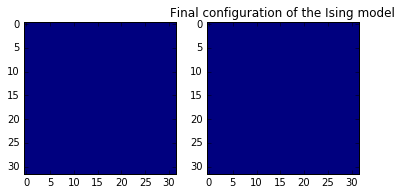

In [6]:
# Snapshot of the configuration at the end of Monte Carlo simulation
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(state1)
ax2.imshow(state_up1)
plt.title('Final configuration of the Ising model')
plt.show()

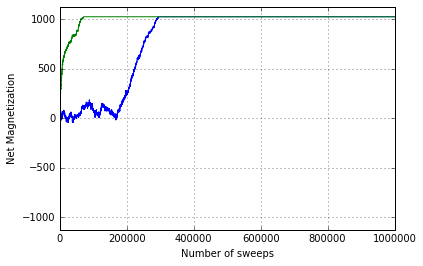

In [7]:
# Net Magnetization as a functions of number of Monte Carlo sweeps
plt.plot(magnetization1)
plt.plot(magnetization2)
plt.xlabel('Number of sweeps')
plt.ylabel('Net Magnetization')
plt.ylim(-1.1*N**2,1.1*N**2)
plt.grid(True)
plt.show()

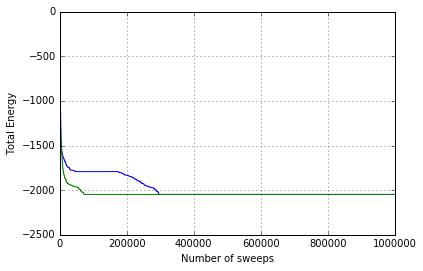

In [8]:
# Net Energy as a functions of number of Monte Carlo sweeps
plt.plot(energy1)
plt.plot(energy2)
plt.xlabel('Number of sweeps')
plt.ylabel('Total Energy')
plt.grid(True)
plt.show()

In [9]:
meanmag1 = np.mean(magnetization1[200000::N**2])
meanmag2 = np.mean(magnetization2[200000::N**2])
print(meanmag1/N**2)
print(meanmag2/N**2)

0.9599434542838875
1.0


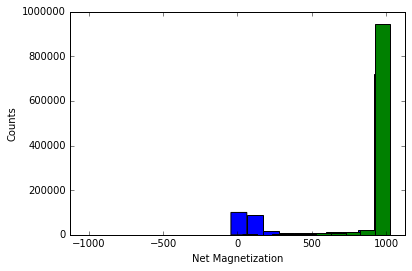

In [10]:
# Histogram for 'Net Magnetization'
plt.hist(magnetization1,bins=10)
plt.hist(magnetization2,bins=10)
plt.xlim(-1.1*N**2,1.1*N**2)
plt.xlabel('Net Magnetization')
plt.ylabel('Counts')
plt.show()

In [11]:
# Auto-Correlation time

def autocorr1(magnetization, teq, tmax,tstep):
    corr = np.zeros(tmax - teq)
    for t in range(tmax-teq):
        corr[t] = (1.0/(tmax - t - teq))\
        *np.dot(magnetization[teq:tmax-t:tstep],magnetization[teq+t:tmax:tstep])\
        -(1.0/(tmax - t - teq)**2)\
        *np.sum(magnetization[teq:tmax-t:tstep])\
        *np.sum(magnetization[teq+t:tmax:tstep])
    return corr

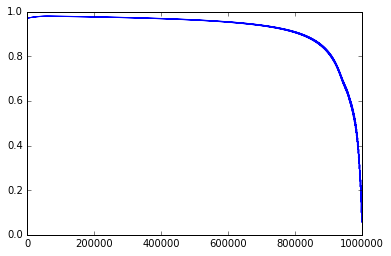

In [12]:
e = autocorr1(magnetization2, 0, N_sweeps, N**2)
plt.plot(e[:-1000]/N**2)
plt.show()